In [1]:
#setup path
path = r'C:/Users/mark/Documents/GitHub/honours/dev/package/'
import sys; sys.path.append(path)

#standard imports
import numpy as np
import pandas as pd
import datetime
from scipy import stats
from collections import OrderedDict
import csv

#third party imports
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import rcParams
from matplotlib import rc
import seaborn as sns
from sklearn.metrics import auc

#local imports
import analysis.dataPreparer as dp
import analysis.getStages as gs

%matplotlib inline
rcParams['figure.figsize'] = 12, 12
sns.set_style("whitegrid")


In [22]:
df = pd.read_csv(r"C:/Users/mark/Documents/GitHub/honours/dev/package/analysis/output/autoVC/6/log_results.csv", quoting = csv.QUOTE_ALL)

In [23]:
df.describe()

,AUC,F1,MC,PRC,build_identifier,cv_folds,index,max_observations,mean_fit_time,mean_score_time,...,rank_test_score,search_iterations,split0_test_score,split1_test_score,split2_test_score,std_fit_time,std_score_time,std_test_score,time_slices,verbosity
count,276.000000,276.000000,276.000000,276.000000,276.0,276.000000,276.0,0.0,274.000000,274.000000,...,274.000000,276.000000,274.000000,274.000000,240.000000,274.000000,274.000000,274.000000,276.0,276.0
mean,0.630785,0.196562,0.194259,0.321866,6.0,2.876812,0.0,NaN,37.252712,291.618348,...,9.547445,18.108696,0.630610,0.629368,0.634335,3.261671,17.843013,0.005084,1.0,1.0
std,0.088065,0.079290,0.064052,0.076114,0.0,0.329250,0.0,NaN,91.699223,514.336457,...,5.992634,5.066374,0.088382,0.086761,0.085555,6.959874,45.113657,0.008808,0.0,0.0
min,0.321747,0.026131,-0.157422,0.134000,6.0,2.000000,0.0,NaN,2.796025,32.348091,...,1.000000,2.000000,0.321747,0.500000,0.505993,0.013274,0.449675,0.000000,1.0,1.0
25%,0.533649,0.123531,0.156644,0.270632,6.0,3.000000,0.0,NaN,9.011404,96.265165,...,4.000000,20.000000,0.534718,0.532174,0.533359,0.433001,2.415352,0.002175,1.0,1.0
50%,0.656935,0.226779,0.208584,0.318675,6.0,3.000000,0.0,NaN,20.297044,160.230687,...,9.000000,20.000000,0.659408,0.648708,0.659165,0.987744,4.763123,0.003871,1.0,1.0
75%,0.704297,0.254315,0.238418,0.377380,6.0,3.000000,0.0,NaN,32.915630,307.110949,...,15.000000,20.000000,0.703608,0.705726,0.702679,3.092413,14.209315,0.005920,1.0,1.0
max,0.779545,0.323758,0.299902,0.524570,6.0,3.000000,0.0,NaN,914.632511,5146.840281,...,20.000000,20.000000,0.770654,0.779545,0.771908,65.756161,395.200734,0.100869,1.0,1.0


In [24]:
main_metrics = ["AUC", "F1", "MC", "PRC", "Time"]

In [25]:
df["param_extractor__n_components_bin_20"] = df["param_extractor__n_components"] // 20

In [26]:
df["Time"] = df["mean_fit_time"]
df["Classifier"] = df["Classifier"].apply(lambda x: x.split("(")[0])
df["param_scaler"] = df["param_scaler"].dropna().apply(lambda x: x.split("(")[0])
df = df.apply(lambda col: col.replace(np.nan, "None") if col.dtype is not np.number else col, axis=1)

In [27]:
df = df.loc[df['param_imputer__strategy'] != "None"]

In [28]:
df["Imputer"] = df["param_imputer__strategy"].map({"most_frequent": "Mode", "median": "Median", "mean": "Mean"})
df["Transformer"] = df["param_transformer__func"].map({"None":"None","<ufunc 'sqrt'>":"SQRT","<ufunc 'log1p'>": "Log1P"})
df["Scaler"] = df['param_scaler']
df["Extractor"]=df['param_extractor__n_components_bin_20'].map({0 : "1-20", 1 : "21-40", 2: "41-60",3: "61-80", 4: "81-100"})
df["Classifier"]=df['Classifier'].map({"LogisticRegression": "Logistic Regression", "RandomForestClassifier":"Random Forest", "DecisionTreeClassifier": "Decision Tree", "GaussianNB": "Naive Bayes", "MLPClassifier": "Artificial Neural Network", "KNeighborsClassifier": "K-Nearest Neighbors", "SVC": "Support Vector Machine"})

In [29]:
df["Time"] = df["Time"].replace("None", np.nan)

In [30]:
df.groupby("Classifier").median()[main_metrics]

,AUC,F1,MC,PRC,Time
Classifier,,,,,
Artificial Neural Network,0.578511,0.223868,0.189419,0.252644,15.879114
Decision Tree,0.688221,0.223412,0.210703,0.360850,15.864375
K-Nearest Neighbors,0.524140,0.092723,0.125698,0.255763,10.035838
Logistic Regression,0.726981,0.243233,0.241469,0.405042,14.909982
Naive Bayes,0.659739,0.252552,0.224296,0.316507,26.450772
Random Forest,0.711114,0.260292,0.261254,0.382261,55.051623
Support Vector Machine,0.548872,0.174662,0.113024,0.406222,746.191362


In [310]:
df["Imputer"] = df["Imputer"]
df["Imputer"] = df["Imputer"].map({"most_frequent": "Mode", "median": "Median", "mean": "Mean"})
df["Imputer"] = df["Imputer"].map({"most_frequent": "Mode", "median": "Median", "mean": "Mean"})

In [355]:
len(df["Scaler"].value_counts().index.tolist())

4

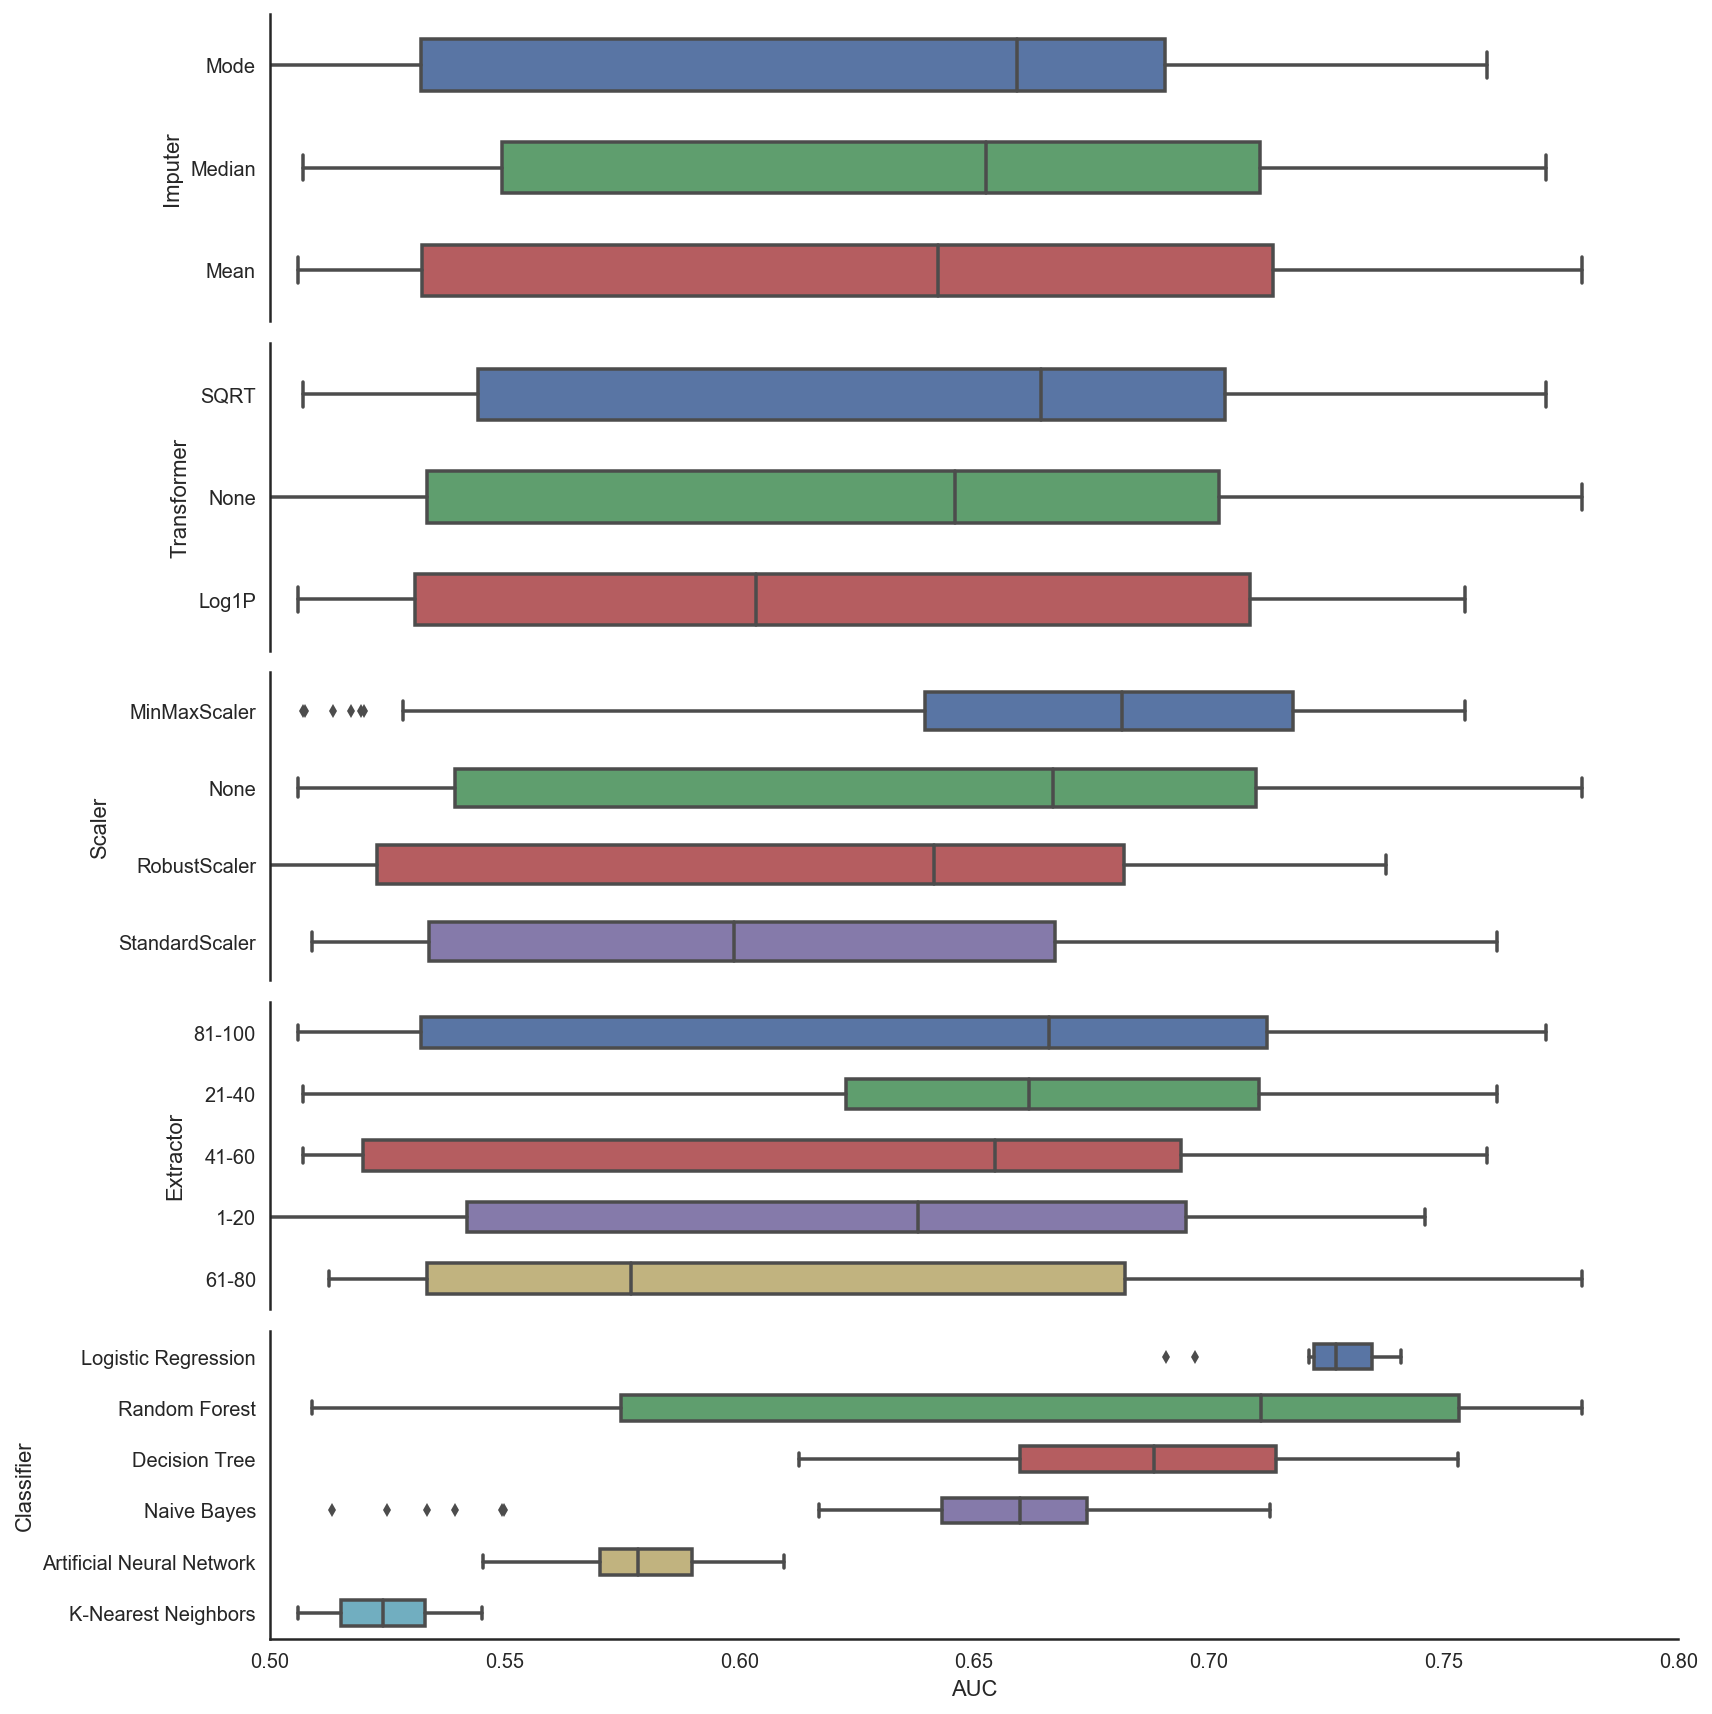

In [374]:
with sns.axes_style("white"):
    f, axes = plt.subplots(5, 1, sharex=True)
    f.set_size_inches(12, 12)

    parameters = ['Imputer', "Transformer", "Scaler", "Extractor", "Classifier"]

    for i, axis in enumerate(axes): 
        axis.set_xlim([0.5, 0.8])
        axis.spines['top'].set_visible(False)
        axis.spines['right'].set_visible(False)
        if i < len(axes) - 1:
            axis.xaxis.label.set_visible(False)
            axis.spines['bottom'].set_visible(False)
        order = df.groupby(parameters[i])["AUC"].median().sort_values(ascending=False).index.tolist()
        sns.boxplot(data=df, x = 'AUC', y = parameters[i], order=order, width=0.5, ax = axis)

    plt.tight_layout()


In [369]:
df["F1"].describe()

count    270.000000
mean       0.196250
std        0.079173
min        0.026131
25%        0.123818
50%        0.226027
75%        0.253487
max        0.323758
Name: F1, dtype: float64

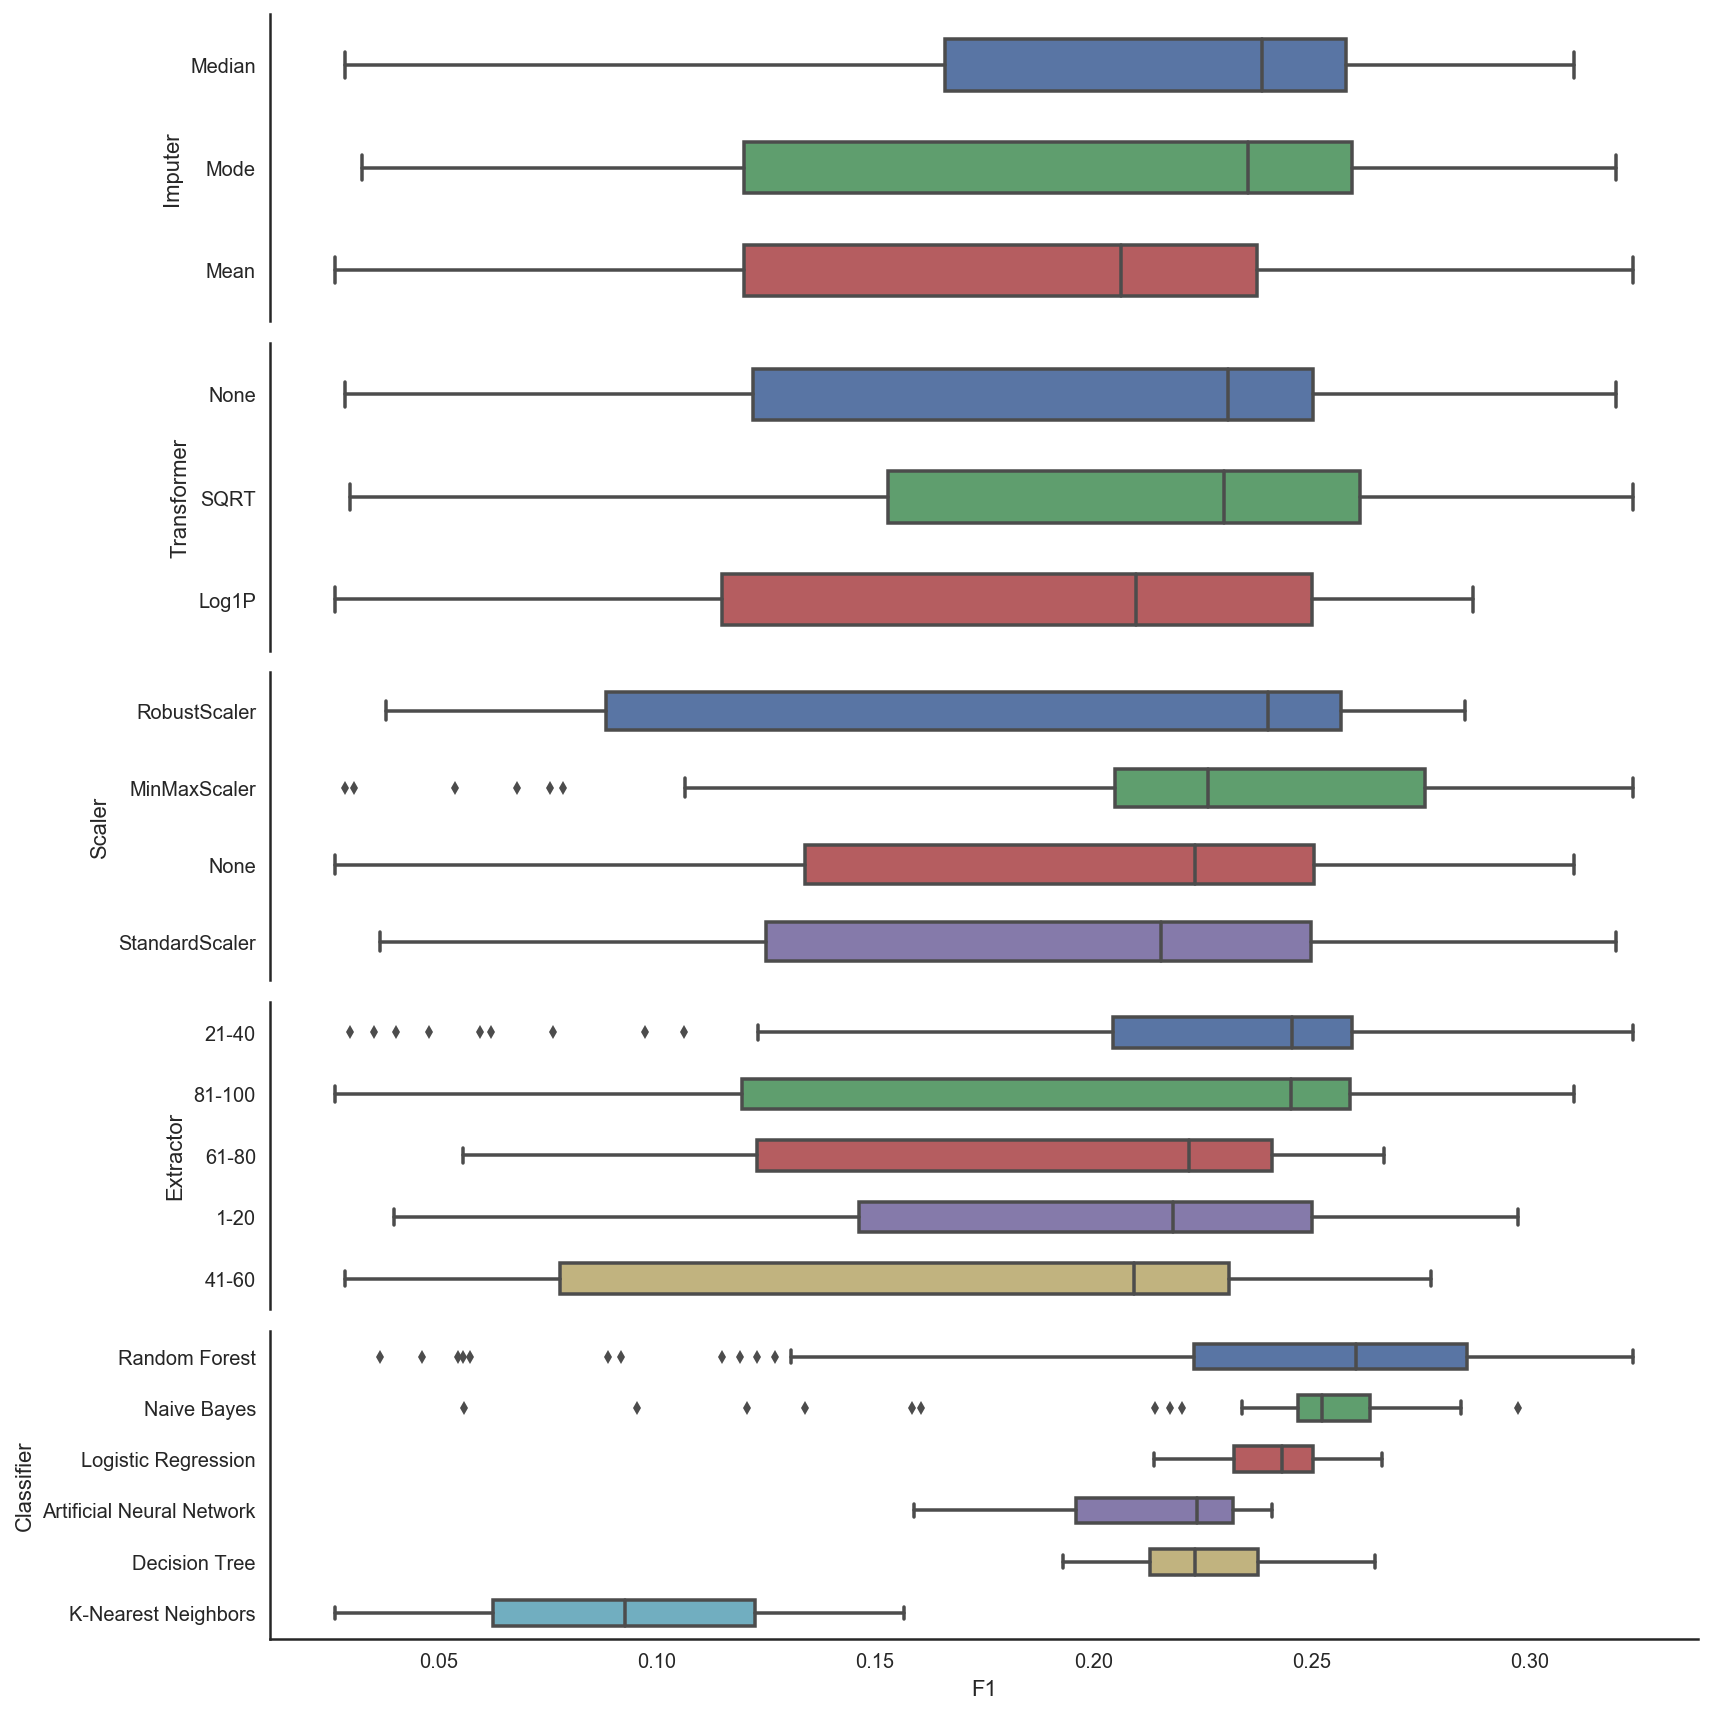

In [370]:
sns.set_style("white")
f, axes = plt.subplots(5, 1, sharex=True)
f.set_size_inches(12, 12)

parameters = ['Imputer', "Transformer", "Scaler", "Extractor", "Classifier"]

for i, axis in enumerate(axes): 
    #axis.set_xlim([0.5, 0.8])
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    if i < len(axes) - 1:
        axis.xaxis.label.set_visible(False)
        axis.spines['bottom'].set_visible(False)
    width = 2 / float(len(df[parameters[i]].value_counts().index.tolist()))
    order = df.groupby(parameters[i])["F1"].median().sort_values(ascending=False).index.tolist()
    sns.boxplot(data=df, x = 'F1', y = parameters[i], order=order, width=0.5, ax = axis)
    
plt.tight_layout()


ROC Curve

In [24]:
def plot_roc_curve(df, iv, dv, x, y, n=None):

    def convert_array(x):
        y = []
        for v in x.split():
            try: float(v)
            except: pass
            else: y.append(float(v))
        return y
        
    roc_x = df[x].apply(convert_array)
    roc_y = df[y].apply(convert_array)
    roc_clf = pd.concat([df[iv], roc_x, roc_y],axis=1)
    roc_clf.index = roc_clf[iv]
    roc_x_clf_split = roc_clf.apply(lambda a: pd.Series(a[x]),axis=1)
    roc_y_clf_split = roc_clf.apply(lambda a: pd.Series(a[y]),axis=1)
    roc_clf_split = pd.DataFrame()
    for col in list(roc_x_clf_split):
        roc_clf_split[col] = list(zip(roc_x_clf_split[col], roc_y_clf_split[col]))
    roc_clf_split[iv] = roc_clf_split.index = roc_x_clf_split.index
    roc_clf_melt = pd.melt(roc_clf_split, id_vars=iv)
    if n: roc_clf_melt = roc_clf_melt.sample(n)
    roc_clf_melt[x] = roc_clf_melt.apply(lambda a: a['value'][0], axis=1)
    roc_clf_melt[y] = roc_clf_melt.apply(lambda a: a['value'][1], axis=1)
    roc_clf_melt = roc_clf_melt[[iv,x,y]]
    roc_clf_melt = roc_clf_melt.dropna()
    
    groups = roc_clf_melt[iv].value_counts().index.tolist()
    grp_aucs = {group: df.groupby(iv).get_group(group)[dv].max() for group in groups}
    print(grp_aucs)
    
    g = sns.lmplot(data = roc_clf_melt, x=x, y=y, hue=iv, fit_reg =False, x_bins = 100, x_estimator = np.max)
    g.axes[0][0].plot((0, 1), (0, 1), 'k--')

{'Mode': 0.75928647208557487, 'Median': 0.77178032250413686, 'Mean': 0.77954465689722063}


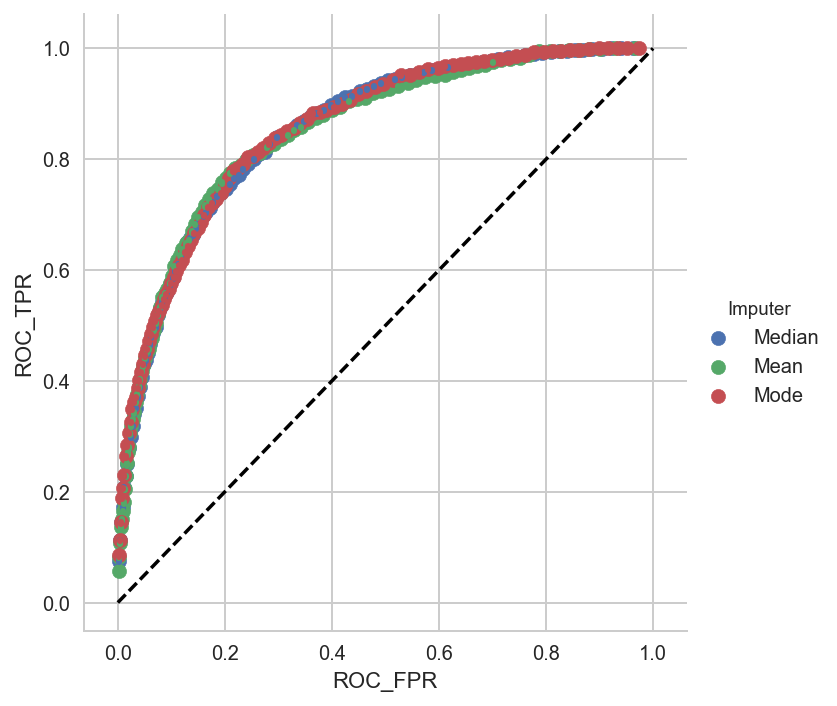

In [376]:
#Imputation Strategies
plot_roc_curve(df, iv = "Imputer", dv = "AUC", x = "ROC_FPR", y = "ROC_TPR", n = None)

{"<ufunc 'log1p'>": 0.6633473333206263, 'None': 0.6476162159921459, "<ufunc 'sqrt'>": 0.6874810101369383}


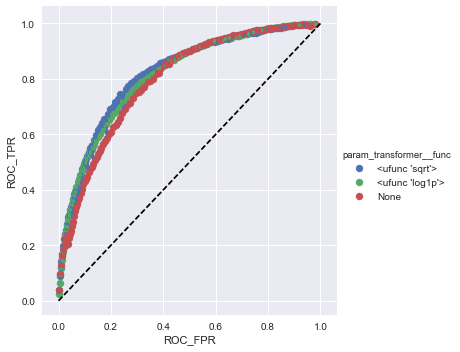

In [72]:
#Transformation Functions
plot_roc_curve(df, iv = "param_transformer__func", dv = "AUC", x = "ROC_FPR", y = "ROC_TPR", n = None)

{'MinMaxScaler': 0.6403293749616866, 'None': 0.6774008700567352, 'StandardScaler': 0.677536298322181, 'RobustScaler': 0.6595490834879532}


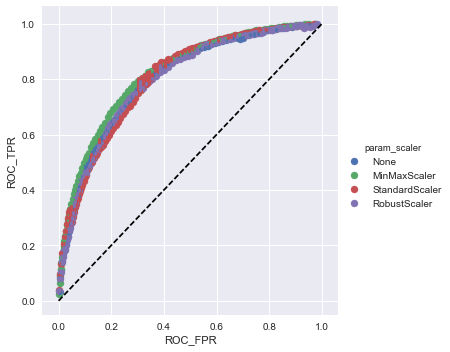

In [76]:
#Scaling Functions
plot_roc_curve(df, iv = "param_scaler", dv = "AUC", x = "ROC_FPR", y = "ROC_TPR", n = None)

{4: 0.6585924526012779, 0: 0.6643398383892103, 2: 0.6556437488418754, 3: 0.6550657543875643, 1: 0.6861463195997645}


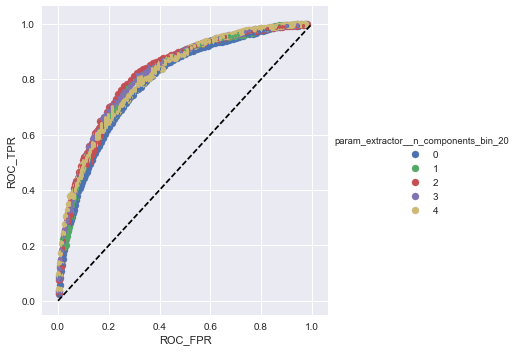

In [77]:
#Extracted Components
df["param_extractor__n_components_bin_20"] = df["param_extractor__n_components"] // 20
plot_roc_curve(df, iv = "param_extractor__n_components_bin_20", dv = "AUC", x = "ROC_FPR", y = "ROC_TPR", n = None)

{'RandomForestClassifier': 0.6578401748025663, 'GaussianNB': 0.6546694010695638, 'DecisionTreeClassifier': 0.6767553409078066}


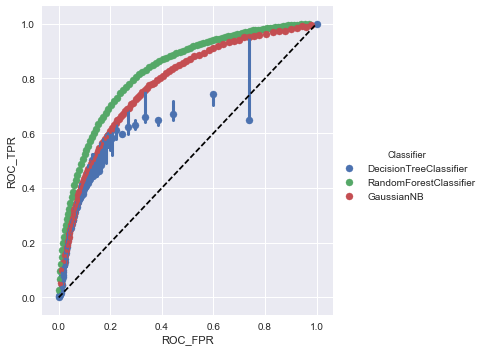

In [70]:
#Classification Algorithms
plot_roc_curve(df, iv = "Classifier", dv = "AUC", x = "ROC_FPR", y = "ROC_TPR", n = None)

Learning Curve

In [83]:
test_scores = "[[ 0.67229625  0.85386642  0.85650085][ 0.66330958  0.74074074  0.74662947][ 0.71335606  0.74941887  0.84441345][ 0.76355748  0.80846118  0.82581745][ 0.74480942  0.77545328  0.65271967]]"
train_scores = "[[ 0.71860465  0.89224806  0.89224806][ 0.67835002  0.76895565  0.76895565][ 0.72781065  0.76627219  0.85629755][ 0.77234553  0.82303539  0.83633273][ 0.74484736  0.7911824   0.65643887]]"
train_sizes = "[ 1290  4194  7098 10002 12906]"

In [2]:
def str_to_matrix(string):
    return np.matrix(string.replace("\r\n ","").replace("][",";").replace("[","").replace("]",""))

In [3]:
def plot_learning_curve(test_scores, train_scores, train_sizes):
    test_scores = str_to_matrix(test_scores).flatten()
    train_scores = str_to_matrix(train_scores).flatten()
    train_sizes = str_to_matrix(train_sizes).flatten().A1
    
    print(test_scores)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1).A1
    train_scores_std = np.std(train_scores, axis=1).A1
    test_scores_mean = np.mean(test_scores, axis=1).A1
    test_scores_std = np.std(test_scores, axis=1).A1
    
    print(train_scores_mean.shape)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

[matrix([[ 0.67229625,  0.85386642,  0.85650085],
        [ 0.66330958,  0.74074074,  0.74662947],
        [ 0.71335606,  0.74941887,  0.84441345],
        [ 0.76355748,  0.80846118,  0.82581745],
        [ 0.74480942,  0.77545328,  0.65271967]]), matrix([[ 0.83263598,  0.82550752,  0.82674725],
        [ 0.71656594,  0.79482411,  0.79311948],
        [ 0.72896327,  0.75918178,  0.76754998],
        [ 0.74693941,  0.73113281,  0.72865334],
        [ 0.77374864,  0.81202541,  0.76290098]]), matrix([[ 0.79993801,  0.79327445,  0.80412211],
        [ 0.81992872,  0.80520688,  0.81233535],
        [ 0.68014877,  0.79807841,  0.77963738],
        [ 0.65566403,  0.79033008,  0.72725864],
        [ 0.79807841,  0.81574461,  0.74616457]]), matrix([[ 0.883793  ,  0.88315512,  0.88114055],
        [ 0.89370933,  0.88052069,  0.88021075],
        [ 0.90114658,  0.90655509,  0.90423059],
        [ 0.88255346,  0.86517899,  0.87246242],
        [ 0.88038426,  0.87556175,  0.88609949]]), matrix([[ 0

In [ ]:
plot_learning_curve(df["Test_Scores"], df["Train_Scores"], df["Train_Sizes"])

In [115]:
df2 = pd.read_csv(r"C:/Users/mark/Documents/GitHub/honours/dev/package/analysis/output/autoVC/9/log_results.csv", quoting = csv.QUOTE_ALL)

In [116]:
df3 = pd.read_csv(r"C:/Users/mark/Documents/GitHub/honours/dev/package/analysis/output/autoVC/10/log_results.csv", quoting = csv.QUOTE_ALL)

In [117]:
df2 = pd.concat([df2, df3],axis=0)

In [118]:
df2.describe()

,AUC,F1,MC,PRC,build_identifier,cv_folds,index,max_observations,mean_fit_time,mean_score_time,...,rank_test_score,search_iterations,split0_test_score,split1_test_score,split2_test_score,std_fit_time,std_score_time,std_test_score,time_slices,verbosity
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.0,255.0,0.0,240.000000,240.000000,...,240.000000,255.0,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,255.000000,255.0
mean,0.670855,0.253200,0.235924,0.354983,9.411765,3.0,0.0,NaN,62.874814,294.609094,...,3.000000,5.0,0.667988,0.666127,0.671813,1.589183,6.543365,0.004751,4.176471,1.0
std,0.072302,0.069494,0.053302,0.084717,0.493121,0.0,0.0,NaN,49.739885,188.824199,...,1.417169,0.0,0.071878,0.072454,0.073070,3.476352,25.023195,0.002724,0.986242,0.0
min,0.519187,0.075778,0.068609,0.133641,9.000000,3.0,0.0,NaN,7.647976,58.955397,...,1.000000,5.0,0.529758,0.519187,0.524792,0.047594,0.050254,0.000212,3.000000,1.0
25%,0.606690,0.195628,0.202690,0.302105,9.000000,3.0,0.0,NaN,29.777046,157.416681,...,2.000000,5.0,0.606149,0.602571,0.606057,0.296280,0.830149,0.002429,3.000000,1.0
50%,0.687438,0.264239,0.241933,0.363237,9.000000,3.0,0.0,NaN,46.906016,231.546616,...,3.000000,5.0,0.685823,0.674634,0.687367,0.767642,1.568813,0.004549,5.000000,1.0
75%,0.733321,0.309494,0.276631,0.428977,10.000000,3.0,0.0,NaN,82.488541,402.267238,...,4.000000,5.0,0.729119,0.728074,0.732483,1.225919,2.163985,0.006211,5.000000,1.0
max,0.781154,0.379010,0.336965,0.479758,10.000000,3.0,0.0,NaN,280.269605,1020.358265,...,5.000000,5.0,0.776731,0.778015,0.781154,22.712310,196.943998,0.014060,5.000000,1.0


In [119]:
from datetime import date, timedelta

In [107]:
df2 = df2.apply(lambda col: col.replace(np.nan, "None") if col.dtype is not np.number else col, axis=1)
df2["Time"] = df2["mean_fit_time"]

df2["Classifier"] = df2["Classifier"].apply(lambda x: x.split("(")[0])
df2["param_scaler"] = df2["param_scaler"].apply(lambda x: x.split("(")[0])

In [408]:
def split_date(x):
    return date(*map(int, x.split("-")))

df2["label_date"] = df2["label_slice"].apply(split_date)
df2["feature_date"] = df2["feature_slice"].apply(split_date)
df2["forecast_window"] =  df2["label_date"] - df2["feature_date"]

In [149]:
df2["forecast_window"].value_counts()

546 days     60
728 days     60
364 days     45
1092 days    30
1274 days    30
910 days     30
Name: forecast_window, dtype: int64

In [109]:
df2["mean_fit_time"].replace("None", np.nan, inplace=True)
df2.groupby("Classifier")["mean_fit_time"].median()

Classifier
RandomForestClassifier    35.855907
Name: mean_fit_time, dtype: float64

In [ ]:
df2["feature"]

In [403]:
df2["forecast_window_months"] = df2["forecast_window"].apply(lambda x: x.days // 30)

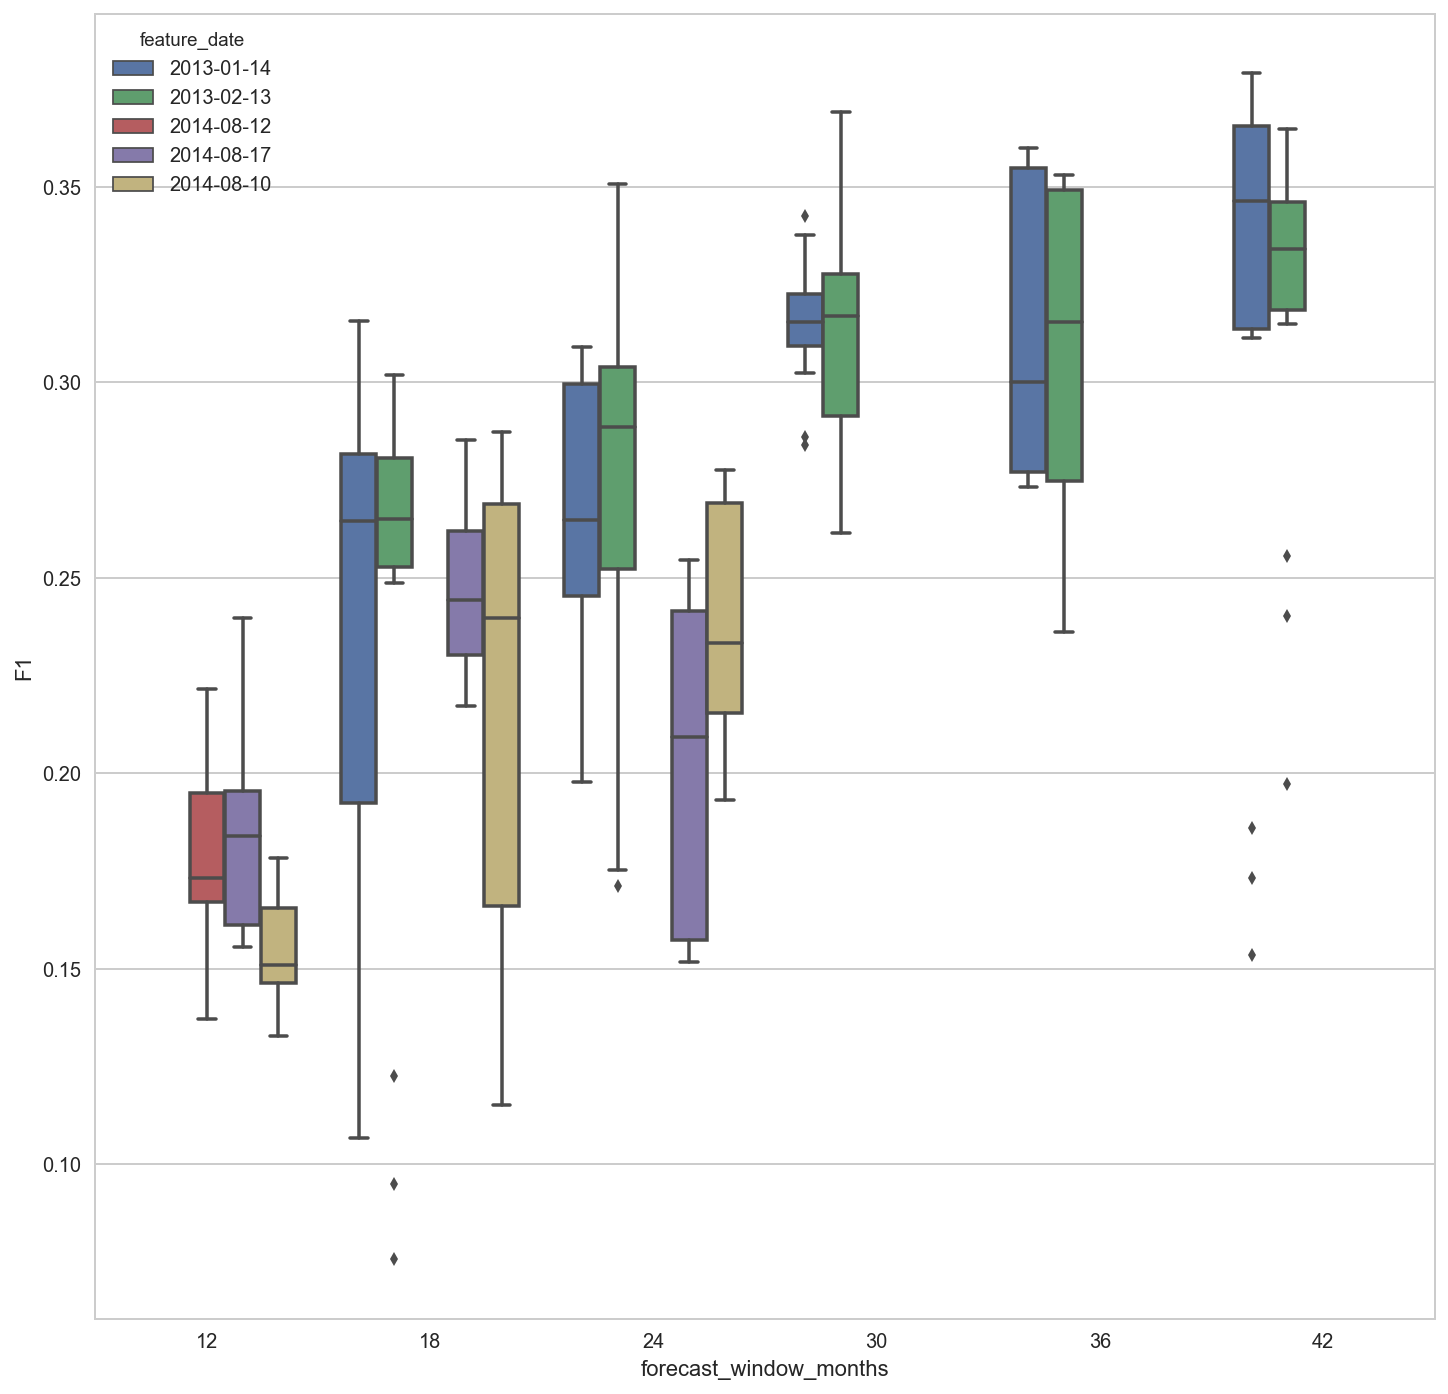

In [410]:
sns.boxplot(data=df2, y = "F1", hue = "feature_date", x="forecast_window_months")

{Timedelta('728 days 00:00:00'): 0.77022337851897893, Timedelta('546 days 00:00:00'): 0.76329025510768245, Timedelta('364 days 00:00:00'): 0.78115383254925552, Timedelta('1274 days 00:00:00'): 0.74469442450236711, Timedelta('1092 days 00:00:00'): 0.75664897852000645, Timedelta('910 days 00:00:00'): 0.76026964706702338}


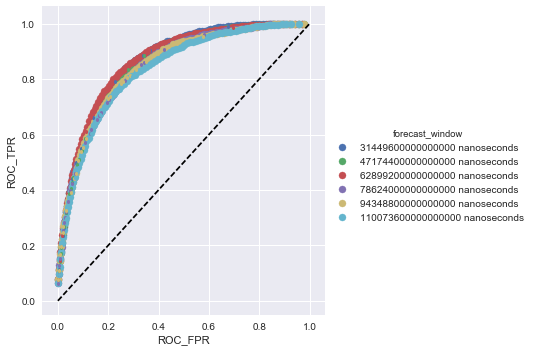

In [150]:
plot_roc_curve(df2, iv = "forecast_window", dv = "AUC", x = "ROC_FPR", y = "ROC_TPR", n = None)

In [114]:
df2.loc[df2["AUC"] >= df2["AUC"].max()- 0.03]["param_clf__criterion"]

0         gini
1         gini
2         gini
7      entropy
27        gini
28        gini
29        gini
32     entropy
39        gini
40        gini
41        gini
69     entropy
70     entropy
71     entropy
81     entropy
82     entropy
108       gini
109       gini
110       gini
114       gini
116       gini
119    entropy
133       gini
134       gini
136    entropy
137    entropy
141    entropy
142    entropy
143    entropy
Name: param_clf__criterion, dtype: object